In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 51.61 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [3]:
img_width = 64
img_height = 64

In [4]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [5]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [6]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [7]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)       

In [18]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)         

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)         

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 15,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
1378/1378 [==============================] - 29s 21ms/step - loss: 0.5660 - accuracy: 0.6863 - val_loss: 0.1812 - val_accuracy: 0.9445
Epoch 2/15
1378/1378 [==============================] - 28s 20ms/step - loss: 0.1791 - accuracy: 0.9442 - val_loss: 0.2107 - val_accuracy: 0.9323
Epoch 3/15
1378/1378 [==============================] - 27s 20ms/step - loss: 0.1517 - accuracy: 0.9538 - val_loss: 0.1693 - val_accuracy: 0.9414
Epoch 4/15
1378/1378 [==============================] - 28s 20ms/step - loss: 0.1455 - accuracy: 0.9551 - val_loss: 0.1936 - val_accuracy: 0.9367
Epoch 5/15
1378/1378 [==============================] - 27s 20ms/step - loss: 0.1347 - accuracy: 0.9593 - val_loss: 0.1780 - val_accuracy: 0.9426
Epoch 6/15
1378/1378 [==============================] - 28s 21ms/step - loss: 0.1375 - accuracy: 0.9573 - val_loss: 0.1656 - val_accuracy: 0.9465
Epoch 7/15
1378/1378 [==============================] - 28s 20ms/step - loss: 0.1187 - accuracy: 0.9630 - val_loss: 0.1974 -

In [22]:
history.history

{'accuracy': [0.8071026802062988,
  0.9472060799598694,
  0.953374445438385,
  0.956549346446991,
  0.958136796951294,
  0.9579553604125977,
  0.9603138566017151,
  0.9596335291862488,
  0.9608581066131592,
  0.9619920253753662,
  0.9622188210487366,
  0.9624909162521362,
  0.9635794758796692,
  0.9633526802062988,
  0.9631712436676025],
 'loss': [0.4054485261440277,
  0.17213983833789825,
  0.15284554660320282,
  0.14263130724430084,
  0.1358691304922104,
  0.13224129378795624,
  0.12612895667552948,
  0.12294716387987137,
  0.12112800031900406,
  0.11775022745132446,
  0.1143183708190918,
  0.11243338882923126,
  0.10748554766178131,
  0.10551059246063232,
  0.105760358273983],
 'val_accuracy': [0.9444646239280701,
  0.9323049187660217,
  0.9413793087005615,
  0.9366605877876282,
  0.9426497220993042,
  0.9464609622955322,
  0.9402903914451599,
  0.9413793087005615,
  0.9424682259559631,
  0.947912871837616,
  0.9471869468688965,
  0.9428312182426453,
  0.9433757066726685,
  0.946098

In [23]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

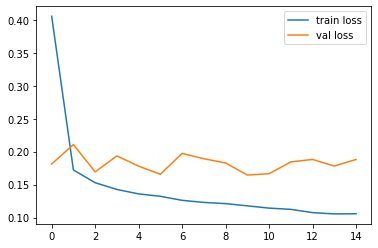

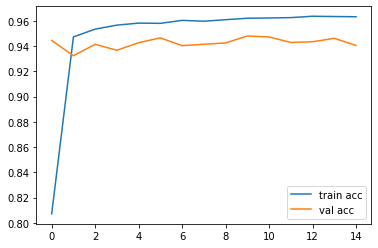

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
from tensorflow.keras.models import load_model

model.save('model_malaria.h5')

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_malaria.h5')

In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_data_generator.class_indices
if result[0][0] == 0:
   print("prediction = Parasitized")
else:
    print("prediction = Uninfected")

prediction = Uninfected
